In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset I

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

df = pd.read_csv('/content/drive/MyDrive/Colab/state_categories.csv')
df.head()

,category,title,text,summary
0,state,ভোট কেন্দ্রে ক্রিকেট খেলছিলেন পুলিশ কর্মকর্তা!,ঠাকুরগাঁও-৩ আসনের উপনির্বাচনে কোনো উত্তাপ ছিল ...,ঠাকুরগাঁও-৩ আসনের উপনির্বাচনে কোনো উত্তাপ ছিল ...
1,state,"এ কেমন শহর, আট মাসে দুবার ডেঙ্গু হয়!",চট্টগ্রাম মেডিকেল কলেজ হাসপাতালের মেডিসিন ওয়ার...,চট্টগ্রাম মেডিকেল কলেজ হাসপাতালের মেডিসিন ওয়ার...
2,state,যেখানে ‘দাপট’ দেখাতে পারছে না আওয়ামী লীগ,রাজপথে শক্তির ‘প্রদর্শন’ কিংবা নির্বাচনী কৌশল—...,রাজপথে শক্তির ‘প্রদর্শন’ কিংবা নির্বাচনী কৌশল—...
3,state,প্রধানমন্ত্রী অনুরোধ করলে ‘না’ করতে পারব না: অ...,"অর্থমন্ত্রী আবুল মাল আবদুল মুহিত বলেছেন, প্রধা...","অর্থমন্ত্রী আবুল মাল আবদুল মুহিত বলেছেন, প্রধা..."
4,state,সাবেক বিমান প্রতিমন্ত্রী মাহবুব আলী গ্রেপ্তার,সাবেক বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত...,সাবেক বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত...


In [ ]:
df

,category,title,text,summary
0,state,ভোট কেন্দ্রে ক্রিকেট খেলছিলেন পুলিশ কর্মকর্তা!,ঠাকুরগাঁও-৩ আসনের উপনির্বাচনে কোনো উত্তাপ ছিল ...,ঠাকুরগাঁও-৩ আসনের উপনির্বাচনে কোনো উত্তাপ ছিল ...
1,state,"এ কেমন শহর, আট মাসে দুবার ডেঙ্গু হয়!",চট্টগ্রাম মেডিকেল কলেজ হাসপাতালের মেডিসিন ওয়ার...,চট্টগ্রাম মেডিকেল কলেজ হাসপাতালের মেডিসিন ওয়ার...
2,state,যেখানে ‘দাপট’ দেখাতে পারছে না আওয়ামী লীগ,রাজপথে শক্তির ‘প্রদর্শন’ কিংবা নির্বাচনী কৌশল—...,রাজপথে শক্তির ‘প্রদর্শন’ কিংবা নির্বাচনী কৌশল—...
3,state,প্রধানমন্ত্রী অনুরোধ করলে ‘না’ করতে পারব না: অ...,"অর্থমন্ত্রী আবুল মাল আবদুল মুহিত বলেছেন, প্রধা...","অর্থমন্ত্রী আবুল মাল আবদুল মুহিত বলেছেন, প্রধা..."
4,state,সাবেক বিমান প্রতিমন্ত্রী মাহবুব আলী গ্রেপ্তার,সাবেক বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত...,সাবেক বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত...
...,...,...,...,...
4984,state,কুমিল্লায় মুনিরীয়া যুব তবলিগের ইফতার মাহফিল অন...,মুনিরীয়া যুব তবলিগ কমিটি বাংলাদেশ কুমিল্লা জেল...,মুনিরীয়া যুব তবলিগ কমিটি বাংলাদেশ কুমিল্লা জেল...
4985,state,'ইউনূসের প্রয়োজনের মুহূর্তে আমার সঙ্গে আন্দোলন...,ইউনূসের প্রয়োজনের মুহূর্তে আমার সঙ্গে আন্দোলনে...,ইউনূসের প্রয়োজনের মুহূর্তে আমার সঙ্গে আন্দোলনে...
4986,state,খালেদা জিয়ার মুক্তির দাবিতে রিজভীর নেতৃত্বে ব...,"বিএনপি চেয়ারপার্সন, খালেদা জিয়ার নিঃশর্ত মুক্ত...","বিএনপি চেয়ারপার্সন, খালেদা জিয়ার নিঃশর্ত মুক্ত..."
4987,state,মাশরাফি ও তার বাবাসহ ৯০ জনের নামে মামলা,নড়াইল-২ আসনের সাবেক সংসদ সদস্য ও সাবেক হুইপ মা...,নড়াইল-২ আসনের সাবেক সংসদ সদস্য ও সাবেক হুইপ মা...


# Install and Imports

In [ ]:
!pip install sentencepiece
!pip install transformers
!pip install git+https://github.com/csebuetnlp/normalizer

import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

from normalizer import normalize # pip install git+https://github.com/csebuetnlp/normalizer


from transformers import XLMProphetNetForConditionalGeneration, XLMProphetNetTokenizer


from transformers import MBartForConditionalGeneration, AutoModelForSeq2SeqLM
from transformers import AlbertTokenizer, AutoTokenizer

  Cloning https://github.com/csebuetnlp/normalizer to /tmp/pip-req-build-0sq76g0e
  Running command git clone --filter=blob:none --quiet https://github.com/csebuetnlp/normalizer /tmp/pip-req-build-0sq76g0e
  Resolved https://github.com/csebuetnlp/normalizer to commit d405944dde5ceeacb7c2fd3245ae2a9dea5f35c9
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for normalizer: filename=normalizer-0.0.1-py3-none-any.whl size=6860 sha256=82d407699afdb15abb697043f286820f218cd3f8f90d379b9a08095954916473
  Stored in directory: /tmp/pip-ephem-wheel-cache-mht0h43g/wheels/2e/79/9c/cd96d490298305d51d2da11484bb2c25fd1f759a6906708282
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186455 sha256=b8303ae8f64aeca08d637510d25f378c7e3db76

In [ ]:
import torch
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

### Functions

In [ ]:
def cleanText(text2clean):
    empty_string = ""

    space = chr(32)
    flag  = 0

    for i in range(len(text2clean)):
        if text2clean[i] != "'" and text2clean[i] != "\n":
            if text2clean[i] == space and flag == 0:
                flag = 1
                empty_string = empty_string + text2clean[i]
            elif text2clean[i] != space:
                empty_string = empty_string + text2clean[i]
                flag = 0
    return empty_string

# Model Loading

### Model Setup

In [ ]:
WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

tokenizer_path = "/content/drive/MyDrive/Colab/mT5_Tokenizer_XLSum"
model_path = "/content/drive/MyDrive/Colab/mT5_Model_XLSum"

# Step 4: Load the tokenizer and model from the specified paths
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)

model.to(device)

### Run dataset over the Model

In [ ]:
df.columns

Index(['category', 'title', 'text', 'summary'], dtype='object')

In [ ]:
rows = df.shape[0]
rows

4989

In [ ]:
# Create empty DataFrame without the "title" column
genDf = pd.DataFrame(columns=["text", "givenSummary", "mT5_Test_XLSum"])

# Load over the dataset
for i in range(rows):
   # Adjust the starting index as needed
        article_text = normalize(df['text'][i])

        # Tokenize the input text
        input_ids = tokenizer(
            [WHITESPACE_HANDLER(article_text)],
            return_tensors="pt",
            padding="max_length",
            max_length=512,
            truncation=True
        )["input_ids"]

        # Generate the summary
        output_ids = model.generate(
            input_ids=input_ids.cuda(),
            max_length=400,
            min_length=64,
            no_repeat_ngram_size=2,
            num_beams=4
        )[0]

        # Decode the generated summary
        summary = tokenizer.decode(
            output_ids,
            skip_special_tokens=True,
            clean_up_tokenization_spaces=False
        )

        # Add the text, given summary, and generated summary to the DataFrame
        genDf.loc[i] = [df['text'][i], df['summary'][i], summary]

        # Print the generated summary for verification
        print(i, '  ', summary)

# Save the DataFrame to CSV
genDf.to_csv('/content/drive/My Drive/Colab/state_finetuned.csv')


0    বাংলাদেশের রাজধানী ঢাকার ঠাকুরগাঁও-৩ আসনের জাতীয় সংসদের উপনির্বাচন বৃহস্পতিবার সকাল থেকে শুরু হয়েছে। কিন্তু কোনো উত্তাপ ছিল না বলে জানিয়েছে স্থানীয় লোকসভা কর্তৃপক্ষ।
1    চট্টগ্রাম নগরের দেওয়ানহাট এলাকার একটি মেসে মো. রাসেল। কয়েক দিন আগে গ্রামের বাড়িতে গিয়েছিলেন তিনি। এরপর থেতু হন তাঁর মেয়ে। সেই সঙ্গে কথা বলতে গিয়ে কষ্ট হয়ে পড়েছিলেন।
2    বাংলাদেশে গত দুটি জাতীয় নির্বাচনে যেভাবে জয় পেয়েছে ক্ষমতাসীন আওয়ামী লীগ, তা নিয়ে অনেকের মনে নানা প্রশ্ন আছে। এটি কেউ বললে তা মোটেও বাড়াবাড়ি হবে না। কিন্তু রাজপথে শক্তির 'প্রদর্শন' কিংবা নির্বাচনী কৌশ
3    বাংলাদেশের অর্থমন্ত্রী আবুল মাল আবদুল মুহিত বলেছেন, প্রধানমন্ত্রী শেখ হাসিনা যদি আমাকে অনুরোধ করেন আরও কিছুদিন দায়িত্ব পালন করতে না তাহলে তো তিনি না করার পারব না। এর আগে সংসদের নির্বাচনেও অংশ নেননি মন্ত্রী।
4    বাংলাদেশের সাবেক বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত্রী মো. মাহবুব আলীকে গ্রেপ্তার করা হয়েছে। তাকে আদালতে পাঠানো হবে বলে জানিয়েছে ঢাকা মহানগর পুলিশের অতিরিক্ত কমিশনার রেজাউল করিম মল্লিক।
5    চাঁপাইনবাবগঞ্জের ন

In [ ]:
import os
os.listdir('/content/gdrive/My Drive/Colab')

['Test_XLSUM.ipynb', 'custom_dataset.csv', 'mt5_finetuned.csv']

In [ ]:
genDf.to_csv('mT5_finetuned_local.csv')  # Saves locally in the Colab environment

In [ ]:
from google.colab import files
files.download('mT5_finetuned_local.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

save_path = '/content/gdrive/My Drive/Colab'
os.makedirs(save_path, exist_ok=True)  # Create the directory if it doesn't exist

# Now save the file
genDf.to_csv(f'{save_path}/mT5_finetuned.csv')

In [ ]:
import os
os.listdir('/content/gdrive/My Drive/Colab')

['Test_XLSUM.ipynb',
 'custom_dataset.csv',
 'mt5_finetuned.csv',
 'mT5_finetuned.csv']

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab/state_finetuned.csv')

# Display the first few rows to verify the file is loaded properly
df.head()

,Unnamed: 0,text,givenSummary,mT5_Test_XLSum
0,0,ঠাকুরগাঁও-৩ আসনের উপনির্বাচনে কোনো উত্তাপ ছিল ...,ঠাকুরগাঁও-৩ আসনের উপনির্বাচনে কোনো উত্তাপ ছিল ...,বাংলাদেশের রাজধানী ঢাকার ঠাকুরগাঁও-৩ আসনের জাত...
1,1,চট্টগ্রাম মেডিকেল কলেজ হাসপাতালের মেডিসিন ওয়ার...,চট্টগ্রাম মেডিকেল কলেজ হাসপাতালের মেডিসিন ওয়ার...,চট্টগ্রাম নগরের দেওয়ানহাট এলাকার একটি মেসে মো...
2,2,রাজপথে শক্তির ‘প্রদর্শন’ কিংবা নির্বাচনী কৌশল—...,রাজপথে শক্তির ‘প্রদর্শন’ কিংবা নির্বাচনী কৌশল—...,বাংলাদেশে গত দুটি জাতীয় নির্বাচনে যেভাবে জয় ...
3,3,"অর্থমন্ত্রী আবুল মাল আবদুল মুহিত বলেছেন, প্রধা...","অর্থমন্ত্রী আবুল মাল আবদুল মুহিত বলেছেন, প্রধা...",বাংলাদেশের অর্থমন্ত্রী আবুল মাল আবদুল মুহিত বল...
4,4,সাবেক বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত...,সাবেক বেসামরিক বিমান পরিবহন ও পর্যটন প্রতিমন্ত...,বাংলাদেশের সাবেক বেসামরিক বিমান পরিবহন ও পর্যট...


In [ ]:
df

In [ ]:
# View the original text, given summary, and generated summary for the first row
sample_index = 0  # You can change this to inspect different rows

# Access text, given summary (if available), and generated summary
original_text = df['text'][sample_index]
given_summary = df['givenSummary'][sample_index]  # If present in the CSV
generated_summary = df['mT5_Test_XLSum'][sample_index]

# Print the text and corresponding summaries
print(f"Original Text:\n{original_text}\n")
print(f"Given Summary (if available):\n{given_summary}\n")
print(f"Generated Summary:\n{generated_summary}\n")

Original Text:
ঠাকুরগাঁও-৩ আসনের উপনির্বাচনে কোনো উত্তাপ ছিল না। সকাল থেকে ভোট কেন্দ্রগুলোতে ভোটারদের উপস্থিতি খুবই কম ছিল। ভোট শুরু হওয়ার পর দুপুরের আগ পর্যন্ত ভোট কেন্দ্রের সংশ্লিষ্টরা অলস সময় পার করছিল।







ভোটার কেন্দ্রে উপস্থিতি না থাকায় এ সময় আসনটির রাণীশংকৈল উপজেলার মীরডাঙ্গী উচ্চ বিদ্যালয় ভোট কেন্দ্রে শিশু-কিশোরদের সঙ্গে ক্রিকেট খেলছিলেন এক পুলিশ কর্মকর্তা। এ নিয়ে স্থানীয়দের মধ্যে মিশ্র প্রতিক্রিয়া দেখা দেয়।




ভোটা কেন্দ্রে পুলিশ কর্মকর্তার ক্রিকেট খেলার দৃশ্য সামাজিক যোগাযোগমাধ্যমে ছড়িয়ে পড়ে। এ বিষয়ে ঠাকুরগাঁও পুলিশ সুপার মো. জাহাঙ্গীর হোসেন বলেন, এতে ভোট কেন্দ্রের ক্ষতি হয়নি।
মীরডাঙ্গী উচ্চ বিদ্যালয় ভোট কেন্দ্রের সহকারী প্রিসাইডিং অফিসার আব্দুর রহিম জানান, এ কেন্দ্রে মোট ভোটার সংখ্যা ৪ হাজার ১৮৬। বিকাল ৩টা পর্যন্ত ১ হাজার ১২০ জন নারী-পুরুষ ভোট দেন। জাতীয় সংসদের এ উপনির্বাচনে ঠাকুরগাঁও-৩ আসনে ৬ জন প্রার্থী প্রতিদ্বন্দ্বিতা করেন। বিএনপির সংসদ সদস্য জাহিদুর রহমান জাহিদ পদত্যাগ করায় আসনটি শূন্য হয়।


Given Summary (if available):
ঠাকুরগাঁও-৩ আসনের উপনির্বাচনে কোনো উত্তাপ ছিল

# **ROGUE SCORE**

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=ca387bd70ec796d089837e823672f594e52d087fc4848ef638c8c0c3aaa4ba33
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
!pip install rouge

import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(8200)
print(sys.getrecursionlimit())

import os
import json
from rouge import Rouge
from csv import DictReader

1000
8200


In [ ]:
def save_file_at_dir(dir_path, filename, file_content, mode='w'):
    os.makedirs(dir_path, exist_ok=True)
    with open(os.path.join(dir_path, filename), mode) as f:
        f.write(file_content)

In [ ]:
def rougeScore(columnName):
    SummaryEv = genDf.filter(['givenSummary', columnName], axis=1)
    # return SummaryEv
    urlCSV = '/content/' + columnName + 'CSV.csv'
    SummaryEv.to_csv(urlCSV, index=False)

    with open(urlCSV, 'r') as f:
        dict_reader = DictReader(f)
        SummaryEv_dict = list(dict_reader)

    EvJson = json.dumps(SummaryEv_dict, indent = 4)
    JSON = columnName + 'EvJson.json'
    save_file_at_dir('/content', JSON, EvJson)

    urlJSON = '/content/' + columnName + 'EvJson.json'

    with open(urlJSON) as f:
        SummaryEvData = json.load(f)
    lenS = len(SummaryEvData)
    rscore1r = 0
    rscore1p = 0
    rscore1f = 0
    rscore2r = 0
    rscore2p = 0
    rscore2f = 0
    rscorelr = 0
    rscorelp = 0
    rscorelf = 0
    rouge = Rouge()
    for i in range(lenS):
        score = rouge.get_scores(SummaryEvData[i][columnName], SummaryEvData[i]['givenSummary'])
        rscore1r = rscore1r + score[0]['rouge-1']['r']
        rscore1p = rscore1p + score[0]['rouge-1']['p']
        rscore1f = rscore1f + score[0]['rouge-1']['f']
        rscore2r = rscore2r + score[0]['rouge-2']['r']
        rscore2p = rscore2p + score[0]['rouge-2']['p']
        rscore2f = rscore2f + score[0]['rouge-2']['f']
        rscorelr = rscorelr + score[0]['rouge-l']['r']
        rscorelp = rscorelp + score[0]['rouge-l']['p']
        rscorelf = rscorelf + score[0]['rouge-l']['f']

        # rscore = [[rscore1r/lenS, rscore1p/lenS, rscore1f/lenS],
        #           [rscore2r/lenS, rscore2p/lenS, rscore2f/lenS],
        #           [rscorelr/lenS, rscorelp/lenS, rscorelf/lenS]]

    rscore = {'rouge-1': {'r': rscore1r/lenS,
                        'p': rscore1p/lenS,
                        'f': rscore1f/lenS},
                'rouge-2': {'r': rscore2r/lenS,
                        'p': rscore2p/lenS,
                        'f': rscore2f/lenS},
                'rouge-l': {'r': rscorelr/lenS,
                        'p': rscorelp/lenS,
                        'f': rscorelf/lenS}}
    return rscore


In [ ]:
mx = rougeScore('mT5_Test_XLSum')
mx

{'rouge-1': {'r': 0.41241932870824716,
  'p': 0.45405701106745694,
  'f': 0.40543683922145274},
 'rouge-2': {'r': 0.2846201404872798,
  'p': 0.3165596536931242,
  'f': 0.27864917123732363},
 'rouge-l': {'r': 0.38562717410689756,
  'p': 0.4213945932230568,
  'f': 0.3779999467906684}}

In [ ]:
def getScore(m, n, x):
    strs = 'rouge-'+str(n)
    return m[strs][x]

In [ ]:
data = {'columns':['rouge-1 r', 'rouge-1 p', 'rouge-1 f', 'rouge-2 r', 'rouge-2 p', 'rouge-2 f', 'rouge-l r', 'rouge-l p', 'rouge-l f'],
        'mT5_Test_XLSum':[getScore(mx, 1, 'r'), getScore(mx, 1, 'p'), getScore(mx, 1, 'f'), getScore(mx, 2, 'r'), getScore(mx, 2, 'p'), getScore(mx, 2, 'f'), getScore(mx, 'l', 'r'), getScore(mx, 'l', 'p'), getScore(mx, 'l', 'f')],
       }

rougeDf = pd.DataFrame(data)
rougeDf_ = rougeDf
rougeDf = rougeDf.reset_index(drop=True).T
rougeDf = rougeDf.rename(columns=rougeDf.iloc[0]).drop(rougeDf.index[0])
rougeDf.reset_index(inplace=True)
rougeDf = rougeDf.rename(columns = {'index':'Summary'})
rougeDf

,Summary,rouge-1 r,rouge-1 p,rouge-1 f,rouge-2 r,rouge-2 p,rouge-2 f,rouge-l r,rouge-l p,rouge-l f
0,mT5_Test_XLSum,0.412419,0.454057,0.405437,0.28462,0.31656,0.278649,0.385627,0.421395,0.378


Text(0, 0.5, 'Score')

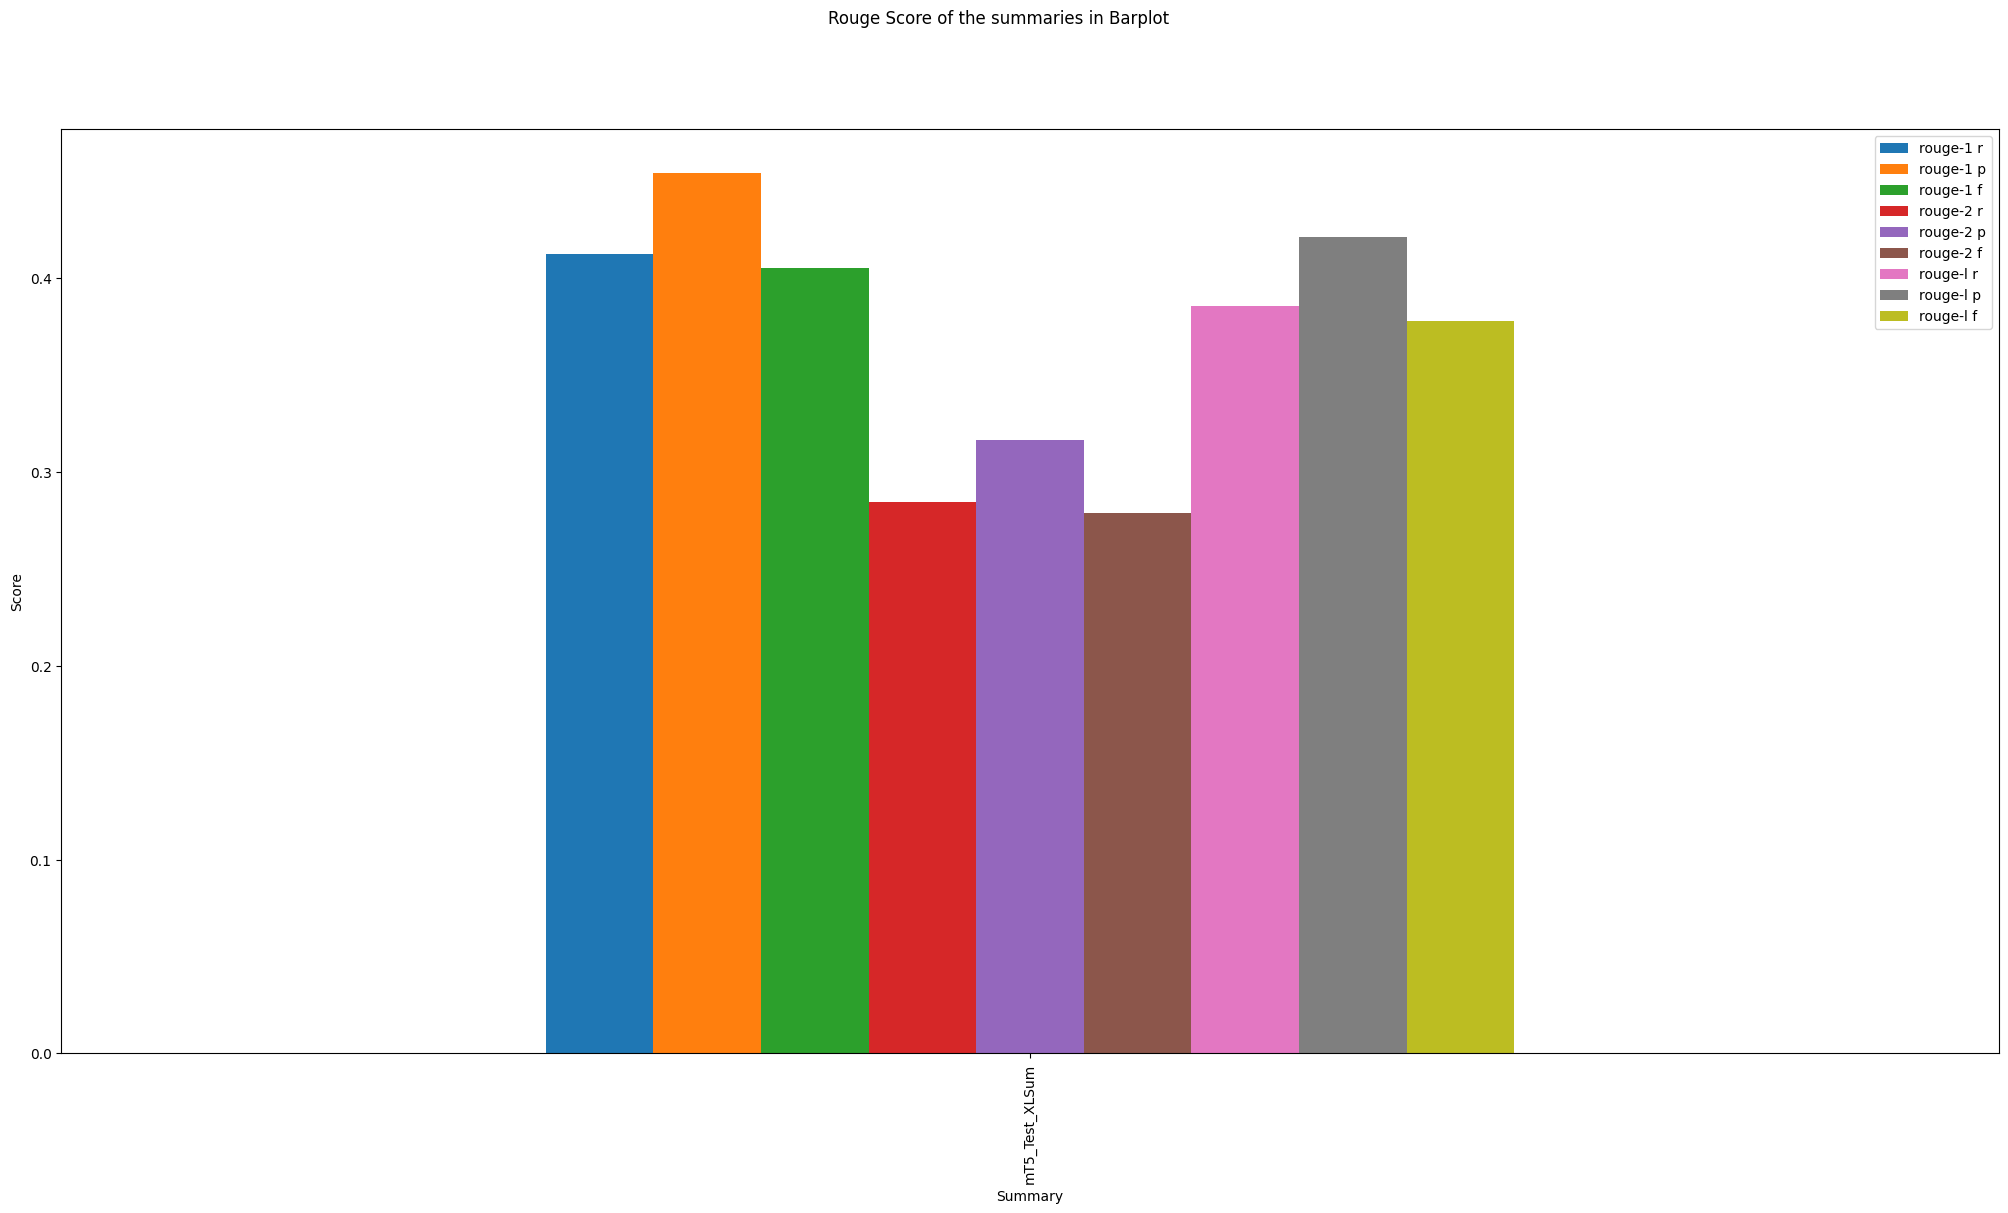

In [ ]:
import matplotlib.pyplot as plt

# plotting graph
rougeDf.plot(x="Summary",
               y=['rouge-1 r',
                'rouge-1 p',
                'rouge-1 f',
                'rouge-2 r',
                'rouge-2 p',
                'rouge-2 f',
                'rouge-l r',
                'rouge-l p',
                'rouge-l f'],
               kind="bar", figsize=(25, 12))

plt.suptitle("Rouge Score of the summaries in Barplot\n\n\n\n\n\n")
plt.ylabel("Score")

# **BLEU SCORE**

In [ ]:
import os
import json
from csv import DictReader

def save_file_at_dir(dir_path, filename, file_content, mode='w'):
    os.makedirs(dir_path, exist_ok=True)
    with open(os.path.join(dir_path, filename), mode) as f:
        f.write(file_content)

genDf.to_csv('/content/bleuEvCSV.csv', index=False)

with open("/content/bleuEvCSV.csv", 'r') as f:
    dict_reader = DictReader(f)
    bleu_dict = list(dict_reader)
print(len(bleu_dict))

bleuEvJson = json.dumps(bleu_dict, indent = 4)
save_file_at_dir('/content', 'bleuEvJson.json', bleuEvJson)

with open('/content/bleuEvJson.json') as f:
  bleuData = json.load(f)

1000


In [ ]:
import nltk

def bleuCorpass(columnName):
    ble1score = 0
    ble2score = 0
    ble3score = 0
    ble4score = 0
    for i in range(len(bleuData)):
        hypothesis = bleuData[i][columnName].split()
        reference = bleuData[i]['givenSummary'].split()
        references = [reference]
        list_of_references = [references]
        list_of_hypotheses = [hypothesis]
        ble1score = ble1score + nltk.translate.bleu_score.corpus_bleu(list_of_references, list_of_hypotheses, weights=(1, 0, 0, 0))
        ble2score = ble2score + nltk.translate.bleu_score.corpus_bleu(list_of_references, list_of_hypotheses, weights=(0.5, 0.5, 0, 0))
        ble3score = ble3score + nltk.translate.bleu_score.corpus_bleu(list_of_references, list_of_hypotheses, weights=(0.33, 0.33, 0.33, 0))
        ble4score = ble4score + nltk.translate.bleu_score.corpus_bleu(list_of_references, list_of_hypotheses, weights=(0.25, 0.25, 0.25, 0.25))

    print("Bleu 1: ", ble1score/len(bleuData),'\n')
    print("Bleu 2: ", ble2score/len(bleuData),'\n')
    print("Bleu 3: ", ble3score/len(bleuData),'\n')
    print("Bleu 4: ", ble4score/len(bleuData),'\n')

    return ble1score/len(bleuData), ble2score/len(bleuData), ble3score/len(bleuData), ble4score/len(bleuData)

In [ ]:
print('mT5_Test_XLSum:', bleuCorpass('mT5_Test_XLSum'))

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Bleu 1:  0.30525841669708415 

Bleu 2:  0.2539332538291919 

Bleu 3:  0.21700711710812814 

Bleu 4:  0.18182833958369993 

mT5_Test_XLSum: (0.30525841669708415, 0.2539332538291919, 0.21700711710812814, 0.18182833958369993)


# **BERTSCORE**

In [ ]:
!pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.8 MB/s eta 0:00:00


In [ ]:
from evaluate import load
bertscore = load("bertscore")

In [ ]:
import sys
print(sys.getrecursionlimit())
sys.setrecursionlimit(8200)
print(sys.getrecursionlimit())

import os
import json
from csv import DictReader

8200
8200


In [ ]:
def save_file_at_dir(dir_path, filename, file_content, mode='w'):
    os.makedirs(dir_path, exist_ok=True)
    with open(os.path.join(dir_path, filename), mode) as f:
        f.write(file_content)

In [ ]:
def bertScore(columnName):
    SummaryEv = genDf.filter(['text', columnName], axis=1)

    lenS = SummaryEv.shape[0]
    bert_precision = 0
    bert_recall = 0
    bert_f1 = 0

    for i in range(lenS):
        results = bertscore.compute(predictions=[SummaryEv[columnName][i]], references=[SummaryEv['text'][i]], lang="bn")

        bert_precision = bert_precision + results['precision'][0]
        bert_recall = bert_recall + results['recall'][0]
        bert_f1 = bert_f1 + results['f1'][0]

    bert_score = {'precision': bert_precision/lenS,
                    'recall': bert_recall/lenS,
                    'f1': bert_f1/lenS}
    return bert_score

In [ ]:
mx = bertScore('mT5_Test_XLSum')
mx

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

{'precision': 0.8145309563477834,
 'recall': 0.6470363418658575,
 'f1': 0.7208741148312886}

In [ ]:
def getScore(m, x):
    strs = x
    return m[strs]

In [ ]:
import pandas as pd

data = {'columns':['bert_precision', 'bert_recall', 'bert_f1'],
        'mT5_Test_XLSum':[getScore(mx, 'precision'), getScore(mx, 'recall'), getScore(mx, 'f1')],
       }

bertScoreDf = pd.DataFrame(data)
bertScoreDf_ = bertScoreDf
bertScoreDf = bertScoreDf.reset_index(drop=True).T
bertScoreDf = bertScoreDf.rename(columns=bertScoreDf.iloc[0]).drop(bertScoreDf.index[0])
bertScoreDf.reset_index(inplace=True)
bertScoreDf = bertScoreDf.rename(columns = {'index':'Summary'})
bertScoreDf

,Summary,bert_precision,bert_recall,bert_f1
0,mT5_Test_XLSum,0.814531,0.647036,0.720874


Text(0, 0.5, 'Score')

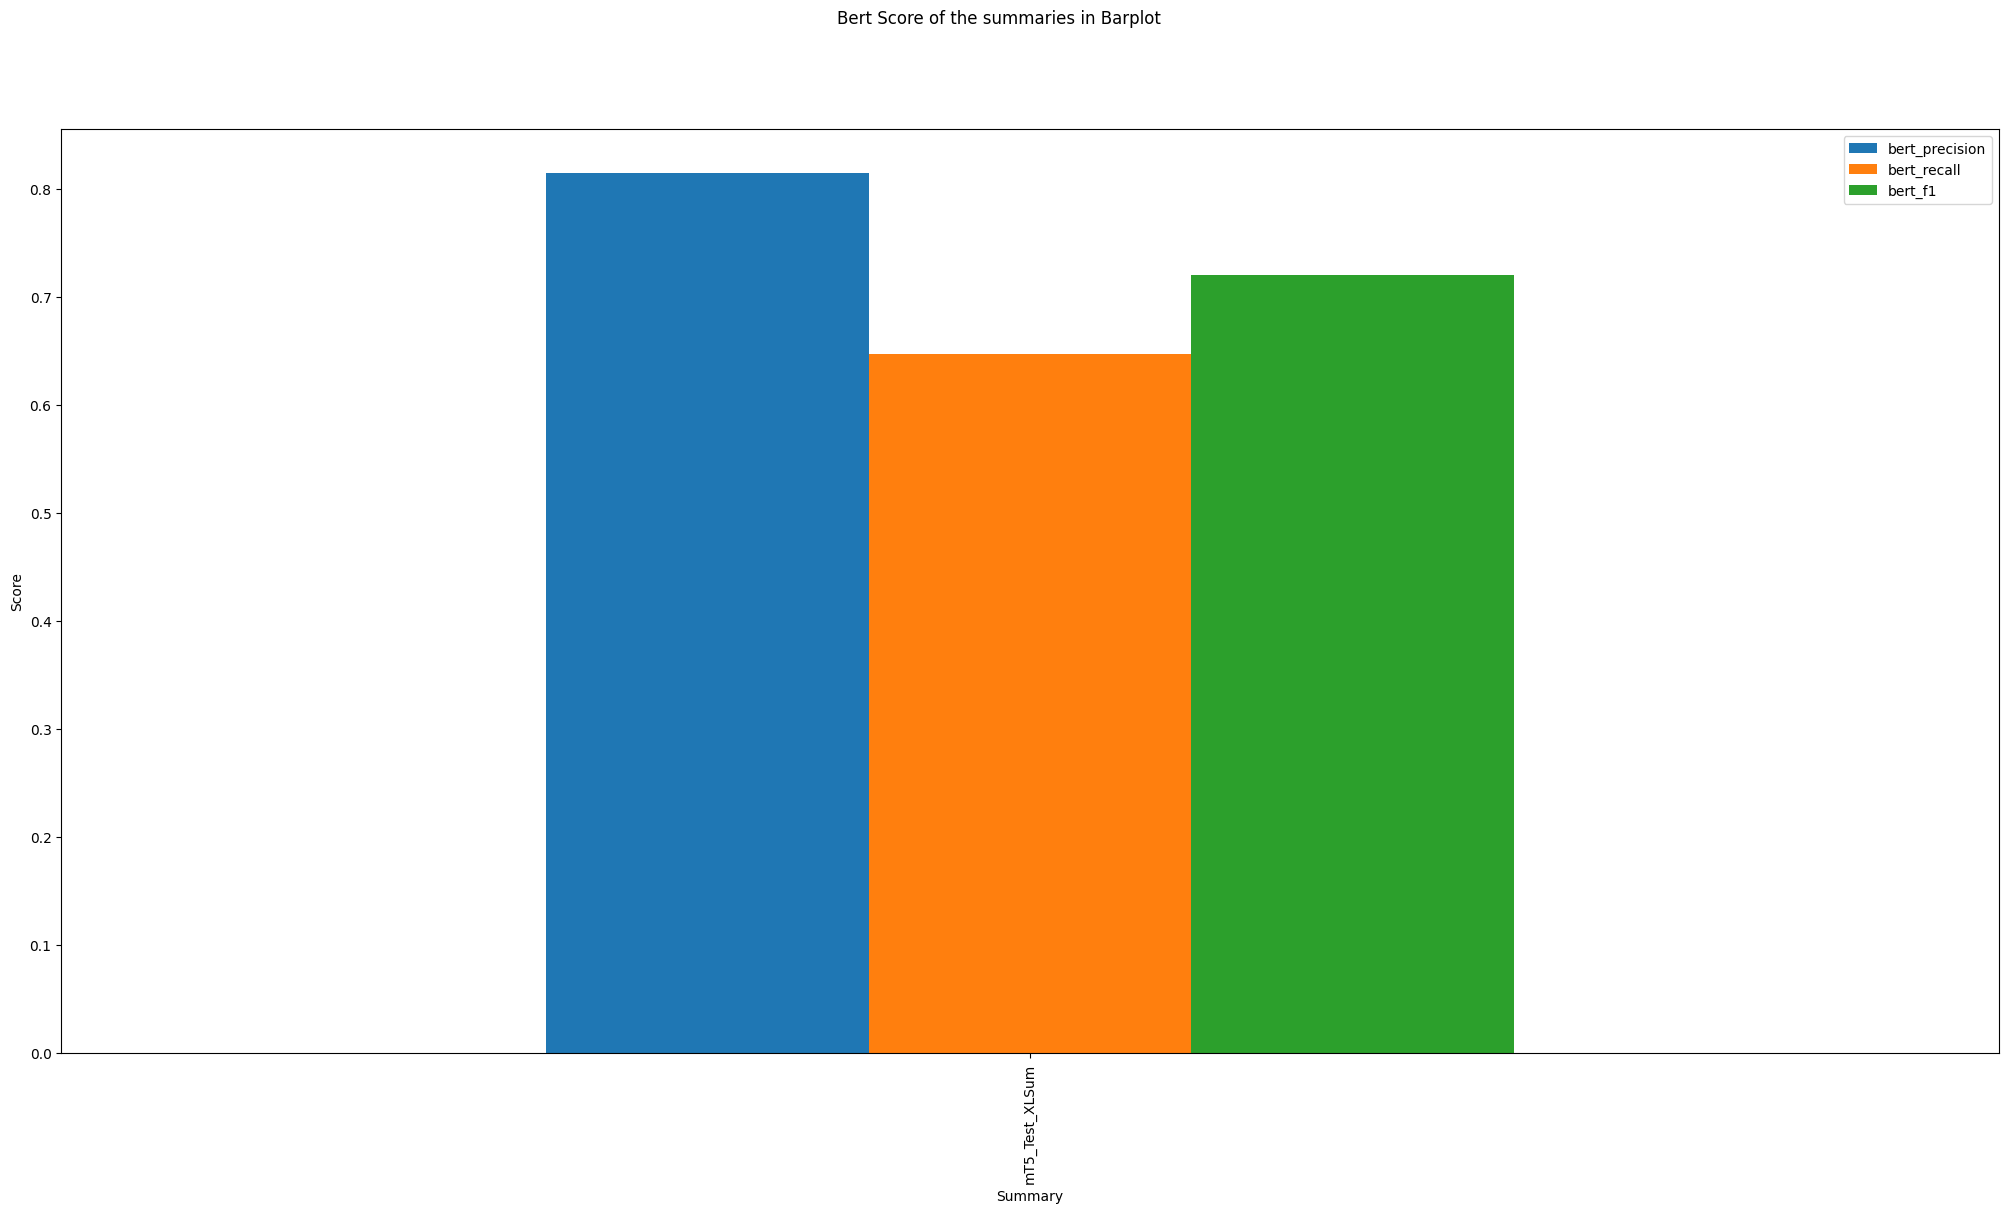

In [ ]:
import matplotlib.pyplot as plt

# plotting graph
bertScoreDf.plot(x="Summary",
               y=['bert_precision',
                'bert_recall',
                'bert_f1'],
               kind="bar", figsize=(25, 12))

plt.suptitle("Bert Score of the summaries in Barplot\n\n\n\n\n\n")
plt.ylabel("Score")

# **WIL WER METEOR WITH GIVEN SUMMARY**

In [ ]:
from collections import Counter

class MeteorScore:
    def __init__(self, alpha=0.5, beta=0.5, gamma=0.5):
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def preprocess_sentence(self, sentence):
        words = sentence.split()
        return words

    def ngram_count(self, sentence, n):
        words = self.preprocess_sentence(sentence)
        ngrams = [tuple(words[i:i+n]) for i in range(len(words)-n+1)]
        return Counter(ngrams)

    def compute_precision(self, hypothesis, reference, n):
        hyp_counts = self.ngram_count(hypothesis, n)
        ref_counts = self.ngram_count(reference, n)
        overlap = sum((hyp_counts & ref_counts).values())
        precision = overlap / sum(hyp_counts.values()) if sum(hyp_counts.values()) > 0 else 0
        return precision

    def compute_recall(self, hypothesis, reference, n):
        hyp_counts = self.ngram_count(hypothesis, n)
        ref_counts = self.ngram_count(reference, n)
        overlap = sum((hyp_counts & ref_counts).values())
        recall = overlap / sum(ref_counts.values()) if sum(ref_counts.values()) > 0 else 0
        return recall

    def meteor_score(self, hypothesis, reference):
        precision = self.alpha * self.compute_precision(hypothesis, reference, 1) + (1-self.alpha) * self.compute_precision(hypothesis, reference, 2)
        recall = self.beta * self.compute_recall(hypothesis, reference, 1) + (1-self.beta) * self.compute_recall(hypothesis, reference, 2)
        fmean = (1-self.gamma) * precision + self.gamma * recall if (precision != 0 and recall != 0) else 0
        return fmean

In [ ]:
!pip install jiwer
import jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.9 MB/s eta 0:00:00


In [ ]:
meteor = MeteorScore(alpha=0.5, beta=0.5, gamma=0.5)

def wilWerMeteorScore(columnName):
    SummaryEv = genDf.filter(['givenSummary', columnName], axis=1)

    lenS = SummaryEv.shape[0]
    wer_score = 0
    meteor_score = 0
    wil_score = 0

    for i in range(lenS):
        wer_result = jiwer.wer(SummaryEv['givenSummary'][i], SummaryEv[columnName][i])
        meteor_result = meteor.meteor_score(SummaryEv[columnName][i], SummaryEv['givenSummary'][i])
        wil_result = jiwer.wil(SummaryEv['givenSummary'][i], SummaryEv[columnName][i])

        wer_score = wer_score + wer_result
        meteor_score = meteor_score + meteor_result
        wil_score = wil_score + wil_result

    wilWerMeteor_score = {'METEOR': meteor_score/lenS,
                    'WER': wer_score/lenS,
                    'WIL': wil_score/lenS}

    return wilWerMeteor_score
    # return spice_score/lenS


In [ ]:
mx = wilWerMeteorScore('mT5_finetuned_test')
mx

{'METEOR': 0.3694995375541737,
 'WER': 1.1714886828484485,
 'WIL': 0.8061316430611867}

In [ ]:
import pandas as pd

data = {'columns':['WIL', 'METEOR', 'WER'],
        'mT5_finetuned_test':[getScore(mx, 'WIL'), getScore(mx, 'METEOR'), getScore(mx, 'WER')],
       }

threeScoreDf = pd.DataFrame(data)
threeScoreDf_ = threeScoreDf
threeScoreDf = threeScoreDf.reset_index(drop=True).T
threeScoreDf = threeScoreDf.rename(columns=threeScoreDf.iloc[0]).drop(threeScoreDf.index[0])
threeScoreDf.reset_index(inplace=True)
threeScoreDf = threeScoreDf.rename(columns = {'index':'Summary'})
threeScoreDf

,Summary,WIL,METEOR,WER
0,mT5_finetuned_test,0.806132,0.3695,1.171489


Text(0, 0.5, 'Score')

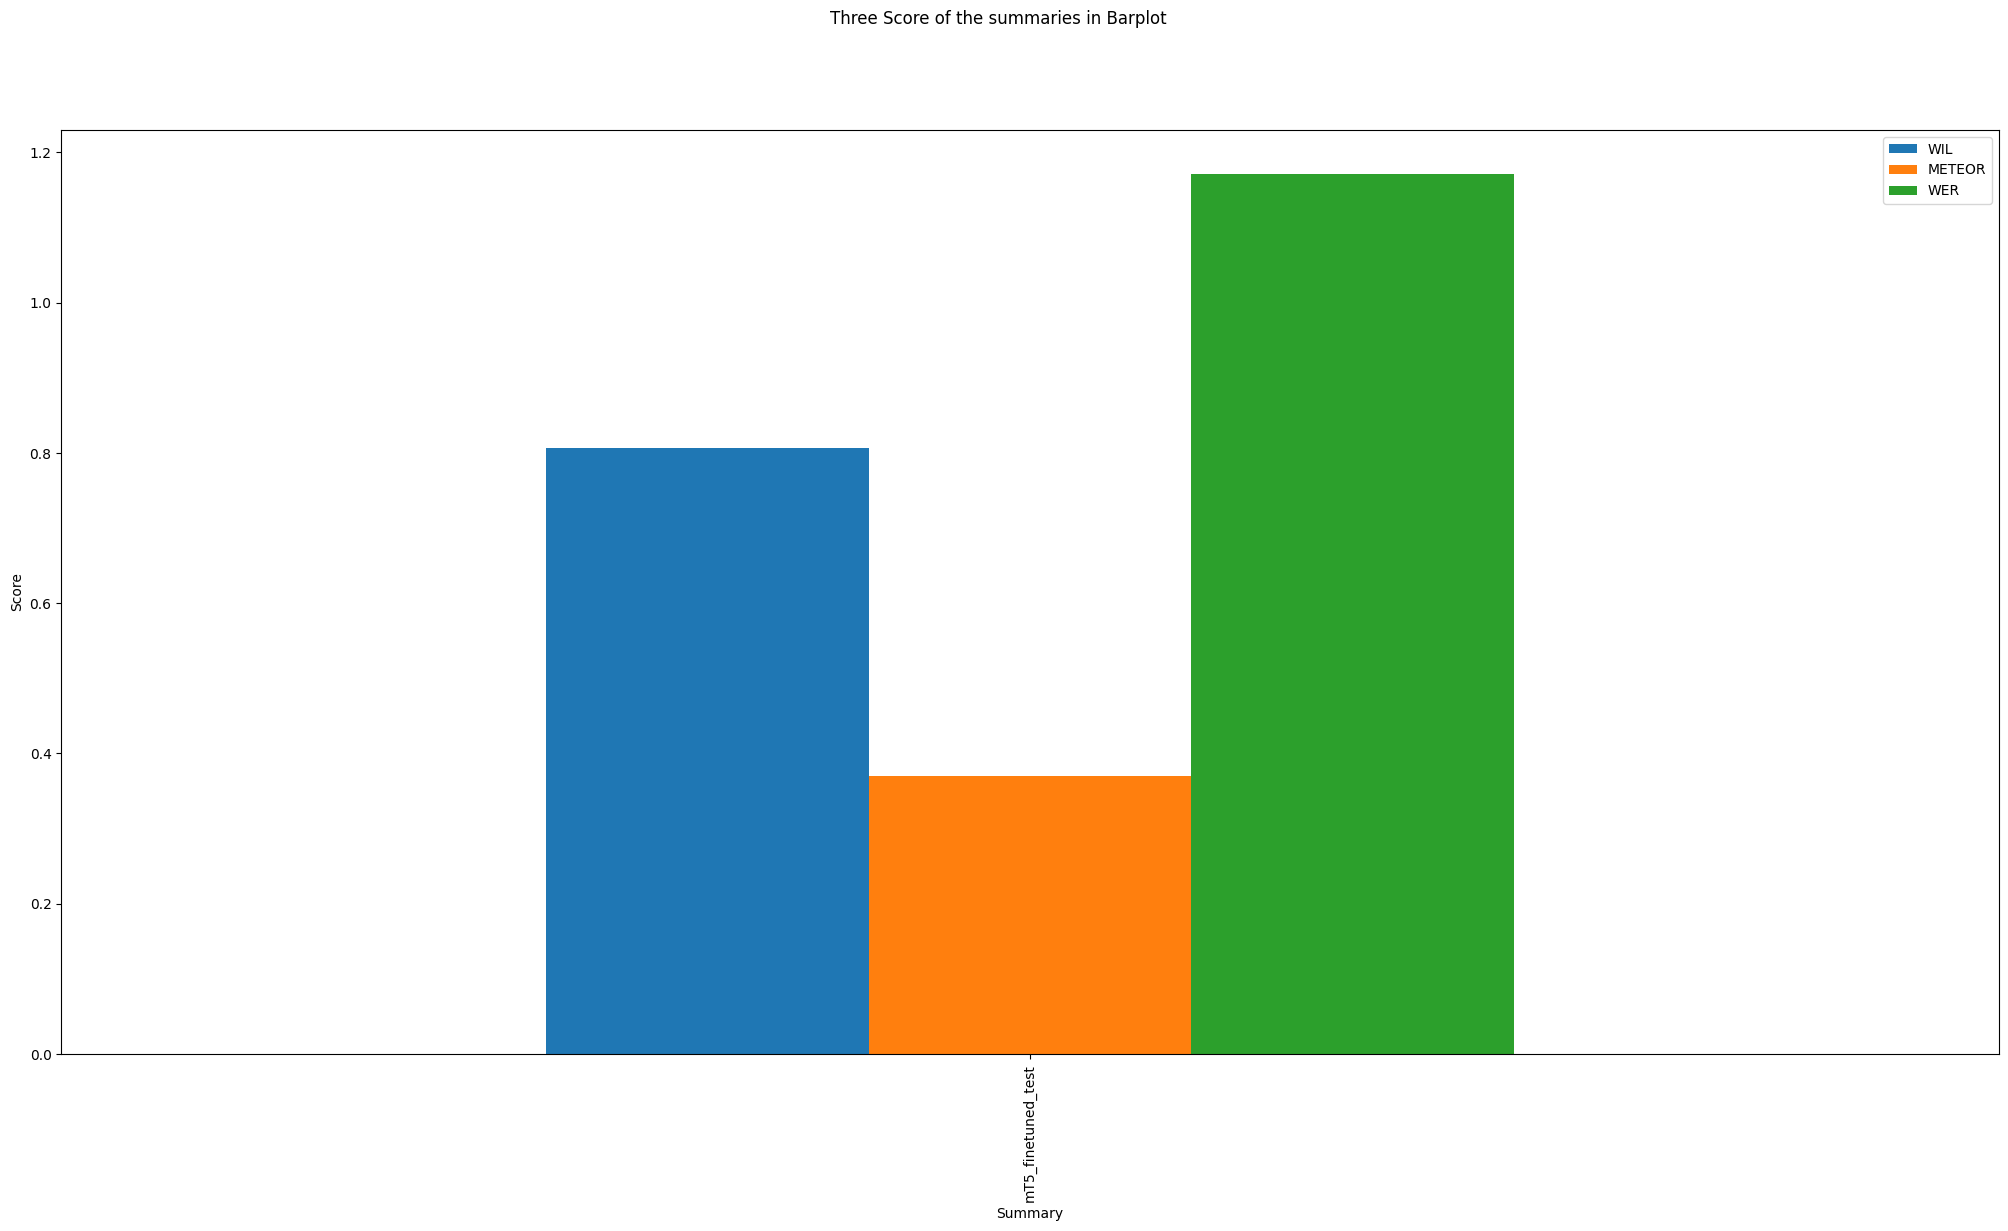

In [ ]:
import matplotlib.pyplot as plt

# plotting graph
threeScoreDf.plot(x="Summary",
               y=['WIL', 'METEOR', 'WER'],
               kind="bar", figsize=(25, 12))

plt.suptitle("Three Score of the summaries in Barplot\n\n\n\n\n\n")
plt.ylabel("Score")

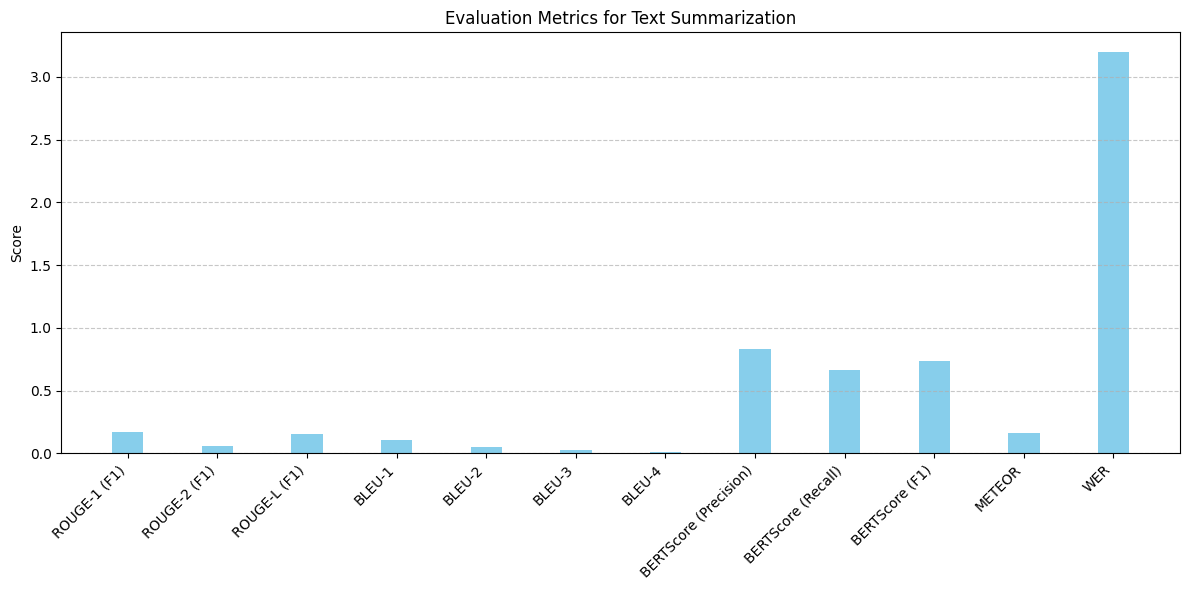

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics and their values
metrics = [
    'ROUGE-1 (F1)', 'ROUGE-2 (F1)', 'ROUGE-L (F1)',
    'BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4',
    'BERTScore (Precision)', 'BERTScore (Recall)', 'BERTScore (F1)',
    'METEOR', 'WER'
]

# Extracted values
values = [
    0.1666,   # ROUGE-1 F1
    0.0598,   # ROUGE-2 F1
    0.1535,   # ROUGE-L F1
    0.1067,   # BLEU-1
    0.0529,   # BLEU-2
    0.0256,   # BLEU-3
    0.0104,   # BLEU-4
    0.8277,   # BERTScore Precision
    0.6640,   # BERTScore Recall
    0.7366,   # BERTScore F1
    0.1642,   # METEOR
    3.1958    # WER
]

# Create a bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(metrics))

plt.bar(x, values, width=bar_width, color='skyblue')
plt.xticks(x, metrics, rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Text Summarization')

# Optionally add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Define the metrics and their values
metrics = [
    'ROUGE-1 (F1)', 'ROUGE-2 (F1)', 'ROUGE-L (F1)',
    'BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4',
    'BERTScore (Precision)', 'BERTScore (Recall)', 'BERTScore (F1)',
    'METEOR', 'WER'
]

# Extracted values
values = [
    0.1666,   # ROUGE-1 F1
    0.0598,   # ROUGE-2 F1
    0.1535,   # ROUGE-L F1
    0.1067,   # BLEU-1
    0.0529,   # BLEU-2
    0.0256,   # BLEU-3
    0.0104,   # BLEU-4
    0.8277,   # BERTScore Precision
    0.6640,   # BERTScore Recall
    0.7366,   # BERTScore F1
    0.1642,   # METEOR
    3.1958    # WER
]

# Create a DataFrame
df = pd.DataFrame({'Metric': metrics, 'Score': values})

# Display the table
print(df)

# If you want to export the table to a CSV file
# df.to_csv('/content/summary_evaluation_metrics.csv', index=False)


                   Metric   Score
0            ROUGE-1 (F1)  0.1666
1            ROUGE-2 (F1)  0.0598
2            ROUGE-L (F1)  0.1535
3                  BLEU-1  0.1067
4                  BLEU-2  0.0529
5                  BLEU-3  0.0256
6                  BLEU-4  0.0104
7   BERTScore (Precision)  0.8277
8      BERTScore (Recall)  0.6640
9          BERTScore (F1)  0.7366
10                 METEOR  0.1642
11                    WER  3.1958


**DATA VISUALIZATION**

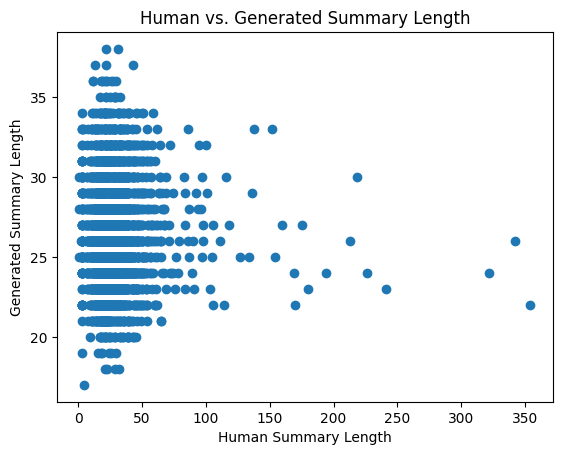

In [ ]:
import matplotlib.pyplot as plt

human_lengths = genDf['givenSummary'].apply(lambda x: len(x.split()))
generated_lengths = genDf['mT5_finetuned_test'].apply(lambda x: len(x.split()))

plt.scatter(human_lengths, generated_lengths)
plt.xlabel('Human Summary Length')
plt.ylabel('Generated Summary Length')
plt.title('Human vs. Generated Summary Length')
plt.show()


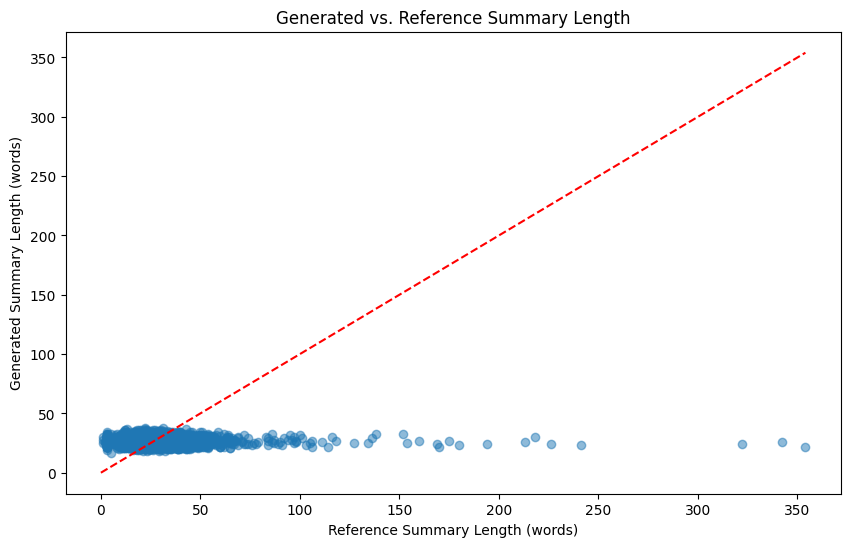

In [ ]:
gen_length = [len(summary.split()) for summary in genDf["mT5_finetuned_test"]]
ref_length = [len(summary.split()) for summary in genDf["givenSummary"]]

plt.figure(figsize=(10, 6))
plt.scatter(ref_length, gen_length, alpha=0.5)
plt.xlabel("Reference Summary Length (words)")
plt.ylabel("Generated Summary Length (words)")
plt.title("Generated vs. Reference Summary Length")
plt.plot([0, max(ref_length)], [0, max(ref_length)], color='red', linestyle='--')  # Diagonal line
plt.show()


# **TEST (NOT INCLUDED)**

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from normalizer import normalize  # Assuming you have this installed
import re

# Device setup
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Load the model and tokenizer
model_name = "csebuetnlp/mT5_multilingual_XLSum"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Move the model to the correct device (GPU or CPU)
model.to(device)

# Define the whitespace handler
WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

# Function to generate a summary
def generate_summary(input_text):
    # Normalize the text (if needed)
    input_text = normalize(input_text)

    # Tokenize the input text
    input_ids = tokenizer(
        [WHITESPACE_HANDLER(input_text)],
        return_tensors="pt",
        padding="max_length",
        max_length=512,
        truncation=True
    )["input_ids"]

    # Generate the summary
    output_ids = model.generate(
        input_ids=input_ids.to(device),
        max_length=400,
        min_length=64,
        no_repeat_ngram_size=2,
        num_beams=4
    )[0]

    # Decode the generated summary
    summary = tokenizer.decode(
        output_ids,
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False
    )

    return summary




/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
# Example of custom input text
custom_text = """
  'ঢাকা মেট্রোপলিটন পুলিশের (ডিএমপি) সাবেক কমিশনার আছাদুজ্জামান মিয়ার গাড়ি, বাড়ি, প্লট, ফ্ল্যাট-কী নেই। রীতিমতো গড়েছেন সম্পদের পাহাড়। শুধু নিজের
  নামেই নয়; স্ত্রী, ছেলে-মেয়ে এবং শ্যালক-শ্যালিকার নামেও গড়েছেন বিপুল সম্পত্তি।\nঅভিযোগ রয়েছে, ডিএমপিতে ‘ঘুষ’ এবং বদলি বাণিজ্যে গড়ে তুলেছেন এসব
  সম্পদ। তার বিপুল সম্পদের বিষয়ে অনুসন্ধান চালাচ্ছে দুর্নীতি দমন কমিশন (দুকক)। যুগান্তরের অনুসন্ধানি প্রতিবেদনে এসব তথ্য ওঠে এসেছে।\nপ্রতিবেদনে জানা যায়,
  রাজধানীর অভিজাত এলাকা সিদ্ধেশ্বরীর ভিকারুননিসা স্কুলের পাশেই রূপায়ণ স্বপ্ন নিলয়। ৫৫/১ হোল্ডিংয়ে আলিশান এ ভবনটি ১১ তলা। এখানে প্রায় সাড়ে ৩ হাজার বর্গফিটের
  একটি ফ্ল্যাট রয়েছে আছাদুজ্জামানের মেয়ে আয়েশা সিদ্দিকার নামে।\nশুক্রবার (২৩ আগস্ট) দুপুরে সেখানে গেলে নিরাপত্তা ইনচার্জ আবুল কালাম আজাদ যুগান্তরকে
   বলেন, তিনি মাস দেড়েক আগে এখানে চাকরি নিয়েছেন। এই ভবনে ১৩০টি ফ্ল্যাট। তাই সব ফ্ল্যাট মালিককে ভালোভাবে চিনেন না। বাড়ির ম্যানেজার সোহেল পারভেজ
    বিস্তারিত বলতে পারবেন বলে জানান তিনি।\nএ বিষয়ে সোহেল পারভেজ জানান, আয়েশা সিদ্দিকার নামে এখানে একটি ফ্ল্যাট আছে। তবে তিনি কখনো এখানে আসেন না।
    এটি ভাড়া দেওয়া আছে।\nধানমন্ডি ১২/এ নম্বর রোডের ৬৯ নম্বর বাড়িতে রয়েছে একটি বিলাসবহুল ফ্ল্যাট। শুক্রবার দুপুরে ওই বাড়িতে যাওয়া হলে ভেতরে প্রবেশের অনুমতি
    মেলেনি। তবে নিজের নাম প্রকাশ না করার শর্তে বাড়ির একজন নিরাপত্তাকর্মী জানান, ধানমন্ডির ১২-এ রোডের ৬৯ নম্বর বাড়ির দ্বিতীয় তলার পুরো ফ্লোরটি সাবেক ডিএমপি
    কমিশনার আছাদুজ্জামান মিয়া কিনেছেন। তবে এটি তার শ্যালকের নামে।\nওই ভবনের তৃতীয় তলার ফ্ল্যাটটি চট্টগ্রাম মেট্রোপলিটন পুলিশের (সিএমপি) সাবেক কমিশনার
    ইকবাল বাহারের। এ বিষয়ে পুলিশ সদর দপ্তরের ডিআইজি কৃষ্ণপদ রায় বলেন, ‘ইকবাল বাহার হলেন আছাদুজ্জামান মিয়ার খুবই ঘনিষ্ঠ। তাই তারা দুজন একই ভবনে
    থাকতেন। আমিও একাধিকবার সেখানে গিয়েছি। আছাদুজ্জামান মিয়া কমিশনার থাকা অবস্থায় ওই ভবনে থাকতেন।’\nশুক্রবার দুপুর আড়াইটায় ইস্কাটন গার্ডেন ১৩/এ
    প্রিয়নীড়ে গিয়ে জানা যায়, সেখানে আছাদুজ্জামানের স্ত্রীর নামে একটি ফ্ল্যাট রয়েছে। বিস্তারিত জানতে চাইলে নিরাপত্তাকর্মী আব্দুস সালাম ও শাহ আলম প্রতিবেদককে
    বলেন, ‘আমরা এখানে নতুন এসেছি, তাই তেমন কিছু জানি না।’\nভবনের ম্যানেজার আজাদ আহমেদ জানান, ১৪ তলা এই ভবনে ৪০টি ফ্ল্যাট আছে। বেশিরভাগ ফ্ল্যাটই
    ২১৩৩ বর্গফুটের। ভবনের ১১ তলায় আছাদুজ্জমানের স্ত্রী আফরোজা জামানের একটি ফ্ল্যাট আছে। তবে সেখানে তিনি থাকেন না। ফ্ল্যাটটি ভাড়া দেওয়া আছে। অভ্যর্থনাকারী
    আবু বকর প্রতি মাসে ভাড়া তুলে আছাদুজ্জামানের কাছে দিয়ে আসেন। ভাড়া বকেয়া পড়লে বা কোনো সমস্যা হলে আমি নিজে স্যারের সঙ্গে (আছাদুজ্জমান) যোগাযোগ
    করেন বলে জানান তিনি।\nখোঁজ নিয়ে জানা যায়, নিকুঞ্জ-১ এর ৮/এ রোডের ৬ নম্বর বাড়িটি আছাদুজ্জামানের ছোট ছেলে আসিফ মাহাদীনের নামে। শুক্রবার বিকালে
    সেখানে যাওয়া হলে বাড়িটি ভেতর থেকে বন্ধ পাওয়া যায়। বেশ কয়েকবার কলিংবেল টিপেও সাড়া পাওয়া যাচ্ছিল না। একপর্যায়ে পাশের চার নম্বর বাড়ির গাড়িচালকের
    সঙ্গে কথা হচ্ছিল এই প্রতিবেদকের। ওই গাড়িচালক জানান, আছাদুজ্জামান সপরিবারে এই বাড়িতে থাকতেন। সরকার পতনের পর তিনি বাড়ি ছেড়ে পালিয়ে গেছেন।
    অনুসন্ধানে আরও জানা যায়, এ ছাড়া বসুন্ধরা আবাসিক এলাকার এল ব্লকের ১ নম্বর রোডের ১৬৬ এবং ১৬৭ নম্বরে ১০ কাঠার ওপর ৬ তলাবিশিষ্ট আলিশান একটি বাড়ি
    আছাদুজ্জামানের স্ত্রী আফরোজা জামানের নামে। পূর্বাচলের নিউ টাউনের ১ নম্বর সেক্টরের ৪০৬/বি নম্বর রোডে ১০ কাঠা জমি রয়েছে আছাদুজ্জামান মিয়ার নামে। ওই জমিতে
     গাড়ি রাখার শেড বানিয়ে রাখা হয়েছে। পূর্বাচলের সেক্টর ৪, রোড ১০৮-এ ৫৩ নম্বর প্লটটি আছাদুজ্জামানের স্ত্রীর নামে ছিল। ৫ কাঠার এই প্লটটি বিক্রি করে দেওয়া হয়েছে।
     আফতাবনগরে ৩ নম্বর সেক্টরে রয়েছে ২১ কাঠা জমি। সেখানে নিজের নামে ১০ কাঠা ও আত্মীয়স্বজনদের নামে রয়েছে বাকি ১১ কাঠা জমি।\nআছাদুজ্জামান
     মিয়ার স্ত্রী আফরোজা জামানের নামে ঢাকা ছাড়াও ফরিদপুর ও নারায়ণগঞ্জে বিপুল সম্পদ রয়েছে। ২০১৮ সালে তিনি রাজউক থেকে বিশেষ কোটায় একটি প্লট বরাদ্দ
     পান। অথচ রাজউকের নীতিমালা অনুযায়ী, স্বামী-স্ত্রী উভয়ের প্লট বরাদ্দ পাওয়ার সুযোগ নেই।\nজানা গেছে, গাজীপুরের কালীগঞ্জ উপজেলার চাঁদখোলা মৌজায় আফরোজা
     জামানের নামে ৬৭ শতাংশ জমি রয়েছে। ২০১৭ সালে এই জমি কেনা হয়। ওই মৌজায় তার নামে ২০১৯ সালের ৫ ফেব্রুয়ারি কেনা হয় আরও ৩৯ শতাংশ জমি। একই নামে
     ২০২০ সালে জোয়ার সাহারা মৌজায় কেনা হয় ১৫ কাঠা জমি। ওই বছর গাজীপুরের চাঁদখোলা মৌজায় ৩১ শতক জমি ক্রয় করেন আফরোজা। আফরোজা ২০১৮ সালে
     নারায়ণগঞ্জের রূপগঞ্জের কৈয়ামসাইল-কায়েতপাড়া মৌজায় দশমিক ২৮ একর জমি কেনেন। ওই বছর একই মৌজায় আরও ৩২ শতক জমি কেনেন তিনি। ওই বছরই
     রূপগঞ্জের কৈয়ামসাইল-কায়েতপাড়া মৌজায় দশমিক ৬০ একর জমি তার নামে কেনা হয়। পরে তা বিক্রি করে দেওয়া হয়। ২০১৯ সালে কৈয়ামসাইল-কায়েতপাড়া মৌজায়
     দশমিক ৫৭ একর জমির পাওয়ার অব অ্যাটর্নি পান আছাদুজ্জামানের স্ত্রী। এরপর ওই জমি বিক্রিও করেন।\nঅনুসন্ধানে আছাদুজ্জামান মিয়ার পরিবারের সদস্যদের মালিকানার
     দুটি কোম্পানির খোঁজ পাওয়া গেছে। এর মধ্যে একটি হলো মৌমিতা ট্রান্সপোর্ট লিমিটেড। এর চেয়ারম্যান আছাদুজ্জামানের স্ত্রী আফরোজা। আছাদুজ্জামান ডিএমপি কমিশনার
     থাকাকালীন রাজধানীর রুট পারমিট কমিটির প্রধান ছিলেন। ওই সময় মৌমিতা পরিবহণকে রুট পারমিট দেওয়া হয়। মৌমিতা ট্রান্সপোর্ট লিমিটেডের ভাইস চেয়ারম্যান হারিসুর
     রহমান সোহান হলেন আছাদুজ্জামানের শ্যালক। সোহানের নামে রাজধানীর নিউমার্কেটে আছে স্বর্ণের দোকান।\nআরও জানা যায়, শেপিয়ার্ড কনসোর্টিয়াম লিমিটেড নামে
     আরেকটি কোম্পানির চেয়ারম্যান আফরোজা জামান। এই কোম্পানির পরিচালক আছাদুজ্জামানের বড় ছেলে আসিফ শাহাদাত। আছাদুজ্জামানের শ্যালক নূর আলম ওরফে
     মিলনের নামে গাজীপুরের শ্রীপুরে দেড় একর জমি রয়েছে। ভাগনে কলমের নামেও গাজীপুরে জমি আছে দেড় একর।\nএদিকে আছাদুজ্জামান মিয়ার অবৈধ সম্পদের
     অনুসন্ধান শুরু করেছে দুদক। সংস্থাটির সচিব খোরশেদা ইয়াসমীন গণমাধ্যমকে বলেন, আছাদুজ্জামান মিয়ার বিরুদ্ধে বিভিন্ন অনিয়ম ও দুর্নীতির মাধ্যমে কোটি কোটি
     টাকার অবৈধ সম্পদ অর্জনের অভিযোগ এসেছে। এই অভিযোগ অনুসন্ধানের সিদ্ধান্ত গৃহীত হয়েছে বলে জানান তিনি।\nআওয়ামী লীগ সরকারের পতনের কয়েকদিন আগে
     আছাদুজ্জামান মিয়া জানিয়েছিলেন, তার এবং পরিবারের সদস্যদের কোনো অবৈধ সম্পদ নেই। যেসব সম্পদ আছে সবই আয়কর বিবরণীতে উল্লেখ করা আছে। সরকারের
     কোনো সংস্থা যদি এসব সম্পদের বিষয়ে অনুসন্ধান চালায় তাহলে তিনি ও তার পরিবারের সদস্যরা ওই সংস্থাকে সহযোগিতা করবেন।'
"""

# Generate the summary for the custom input text
generated_summary = generate_summary(custom_text)

# Print the original text and its generated summary
print("\nGenerated Summary:\n", generated_summary)


Generated Summary:
 ঢাকা মেট্রোপলিটন পুলিশের (ডিএমপি) সাবেক কমিশনার আছাদুজ্জামান মিয়া রীতিমতো গড়েছেন বিপুল সম্পত্তি। তার গাড়ি, বাড়ি, প্লট এবং ফ্ল্যাট-কী নেই। অনুসন্ধানে এসব তথ্য উঠে এসেছে।


In [ ]:
custom_text2 = """
বাংলাদেশের অর্থনৈতিক অবস্থা উন্নতির দিকে ধাবিত হচ্ছে, বিশেষ করে গত কয়েক বছরে রপ্তানি খাতে ব্যাপক অগ্রগতি হয়েছে।
অর্থনীতিবিদরা মনে করছেন, এই অগ্রগতি ধরে রাখতে পারলে বাংলাদেশের অর্থনীতি দক্ষিণ এশিয়ার অন্যতম শক্তিশালী অর্থনীতিতে পরিণত হতে পারে।
"""

generated_summary = generate_summary(custom_text2)
print("\nGenerated Summary:\n", generated_summary)



Generated Summary:
 বাংলাদেশের অর্থনীতি দক্ষিণ এশিয়ার সবচেয়ে শক্তিশালী দেশগুলোর একটি হিসেবে পরিণত হতে পারে বলে মনে করছেন অর্থনৈতিক বিশ্লেষকরা। এর মধ্যে রপ্তানি খাতে ব্যাপক অগ্রগতি হয়েছে।
